# LASSO RIDGE Practice

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Advertising.csv')     # reklamlarin sales uzerindeki etkisi tahmin edilecek

In [4]:
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


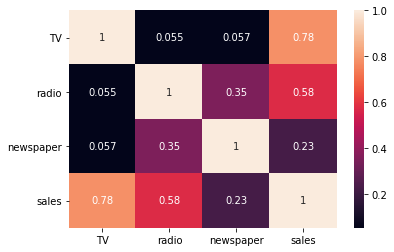

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
X = df.drop(['sales'], axis = 1)

In [9]:
y = df['sales']

In [10]:
X.head(3)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [11]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

**1. Linear Regression**

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
dir(lm) # lm object icine bakilabiliyor

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [18]:
lm.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

In [19]:
lm.intercept_

2.9948930304953336

In [21]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
TV,0.044584
radio,0.196497
newspaper,-0.002781


In [22]:
y_pred = lm.predict(X_test)

In [23]:
eval_metrics(y_test, y_pred)

r2_score: 0.8601145185017868 
 mae: 1.3617813502090272 
 mse: 4.402118291449685 
 rmse: 2.0981225634956804


In [32]:
lm.score(X_train, y_train)  # train set icin score

0.9067114990146383

In [29]:
lm.score(X_test, y_test)  # score hesaplamak icin

0.8601145185017868

In [31]:
r2_score(y_test, y_pred)  #  # score hesaplamak icin - 2

0.8601145185017868

In [24]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [26]:
compare.sample(10)

,Actual,Pred
37,14.7,15.905160
45,14.9,15.135122
152,16.6,16.343580
18,11.3,10.057396
83,13.6,14.689538
183,26.2,24.066921
5,7.2,12.782869
55,23.7,21.402720
106,7.2,6.188351
123,15.2,15.247493


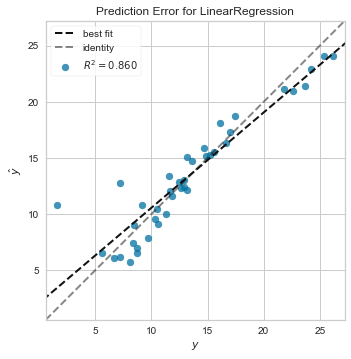

In [28]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

ValueError: x and y must be the same size

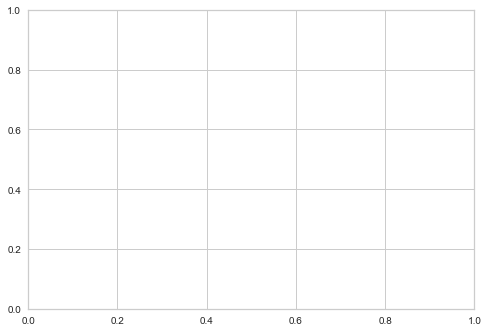

In [36]:
plt.scatter(X_test, y_test);

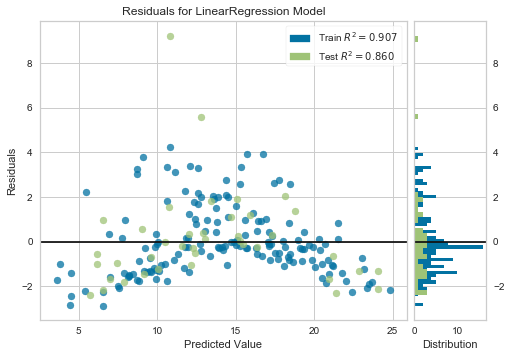

In [35]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

** Model Score with Cross Validation **

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8832984266379699

In [40]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
accuraries.mean()   # alternatif olarak negatif MSE

-2.6112323155583232

**2. Ridge Regression**

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [42]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling yapilir - lasso v eridge icin scaling gereklidir. Linear Regression, poly, random forest scaling gerektirmez.

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [46]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test) # fit icin train kullanilir, transform icin hem train hem test kullanilir.

In [47]:
a = pd.DataFrame(X_train, columns = X.columns)

In [48]:
a.head()

,TV,radio,newspaper
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


In [ ]:
# scaled X_train = scaler.fit_transform(X_train)
# not fit for X_test

In [49]:
ridge_model = Ridge()

In [50]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [51]:
eval_metrics(y_test, y_pred)

r2_score: -13616.183152418758 
 mae: 564.2031862605515 
 mse: 428525.17924848973 
 rmse: 654.618346251073


In [52]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8832984266379699

In [53]:
ridge_model = Ridge(3).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -13297.587087052743 
 mae: 557.732594942924 
 mse: 418499.1382904826 
 rmse: 646.9150935713918


In [55]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [56]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [57]:
# best lambda/alpha
ridgecv.alpha_

3.7181818181818183

In [ ]:
# alpha selection yontemi

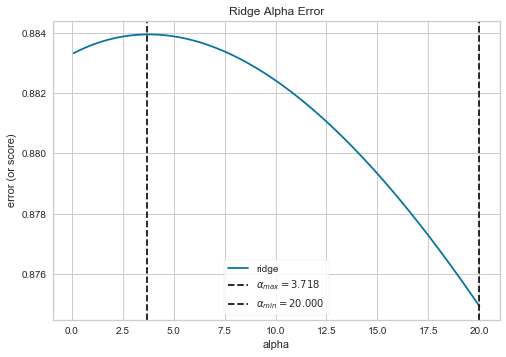

In [58]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show();

In [59]:
ridge_model = Ridge(3.7).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -13188.789468839263 
 mae: 555.5043002397902 
 mse: 415075.33776397945 
 rmse: 644.2634071278451


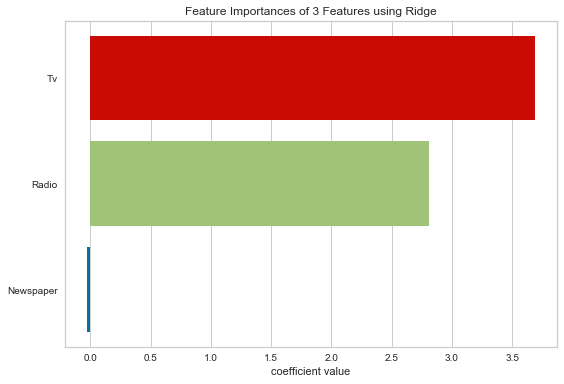

In [60]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [61]:
ridge_model.coef_

array([ 3.6900482 ,  2.814495  , -0.02611704])

**Lasso Regression**

In [62]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [63]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -7510.215912900165 
 mae: 418.8924317628951 
 mse: 236373.78666511658 
 rmse: 486.1828736855265


In [65]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8155099608241121

In [66]:
lasso_model.alpha

1.0

In [69]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [70]:
lasso_cv_model.alpha_

0.1

In [71]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

In [73]:
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

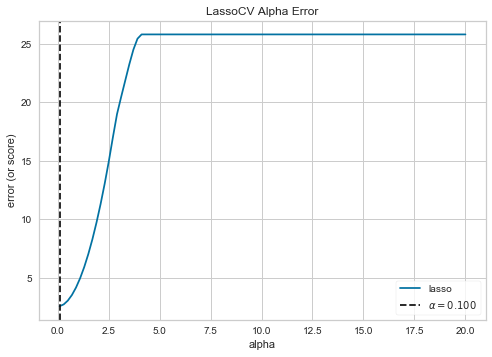

In [74]:
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [75]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8155099608241121

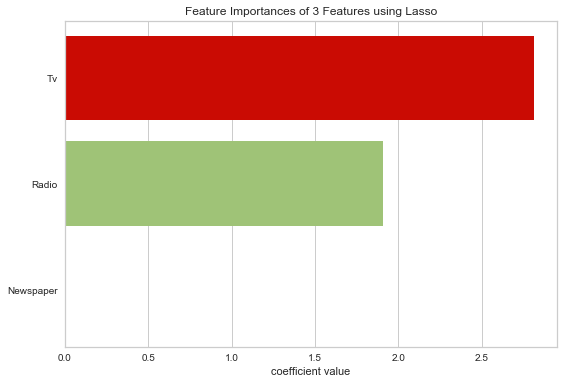

In [76]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**4. Elastic Net**

In [ ]:
# lasso veya ridge secimi icin sonuc veren bir uygulama

In [77]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.1, .5, .7,.9, .95, .99, 1])

In [78]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbo

In [79]:
elastic_model.l1_ratio_

1.0

In [81]:
elastic_model.alpha_

0.1

In [82]:
y_pred = elastic_model.predict(X_test)

In [84]:
eval_metrics(y_test, y_pred)

r2_score: -13078.84744302051 
 mae: 553.2894816233063 
 mse: 411615.5233667152 
 rmse: 641.5726953095145


**Polynomial Regression**

In [87]:
# not gonna use scaled X
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 10)

In [88]:
X.shape

(200, 3)

In [89]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [90]:
poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [93]:
# polynomial cok iyi sonuc verir. Outlier olunca kotu sonuc verir. Veri seti cok iyi olmali.

In [94]:
model= LinearRegression()

In [95]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred = model.predict(X_test)

In [98]:
eval_metrics(y_test, y_pred)

r2_score: 0.9843529333146777 
 mae: 0.4896798044803976 
 mse: 0.4417505510403929 
 rmse: 0.6646431757269406


In [99]:
# cross validate edelim

In [100]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9814092804779214

In [101]:
accuraries

array([0.98721689, 0.99303246, 0.9905022 , 0.98369201, 0.98423858,
       0.93187129, 0.9907614 , 0.99330359, 0.96496016, 0.99451422])

In [102]:
y_pred_train = model.predict(X_train)
eval_metrics(y_test, y_pred)

r2_score: 0.9843529333146777 
 mae: 0.4896798044803976 
 mse: 0.4417505510403929 
 rmse: 0.6646431757269406


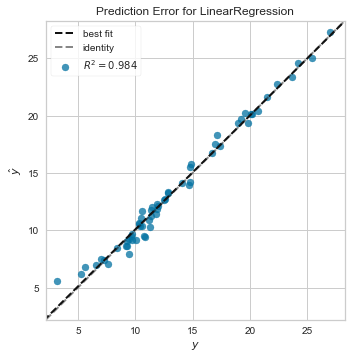

In [103]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

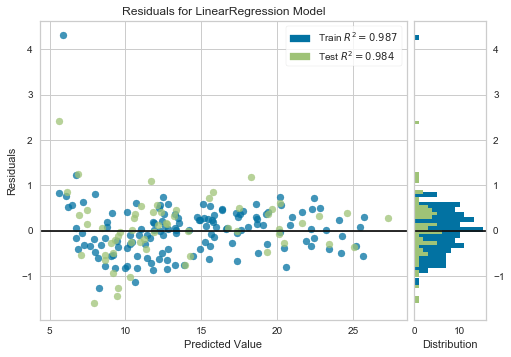

In [104]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [105]:
# 3 ile denersek

In [135]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=4)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 35)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [137]:
model= LinearRegression()

In [138]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
y_pred = model.predict(X_test)

In [140]:
eval_metrics(y_test, y_pred)

r2_score: 0.9439459631627802 
 mae: 0.630591149554178 
 mse: 1.5825267546222044 
 rmse: 1.2579851965036013


In [141]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9459790646196835

In [142]:
y_pred_train = model.predict(X_train)
eval_metrics(y_test, y_pred)

r2_score: 0.9439459631627802 
 mae: 0.630591149554178 
 mse: 1.5825267546222044 
 rmse: 1.2579851965036013


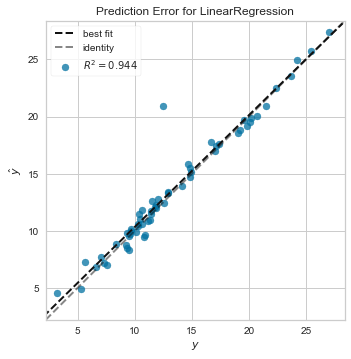

In [143]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

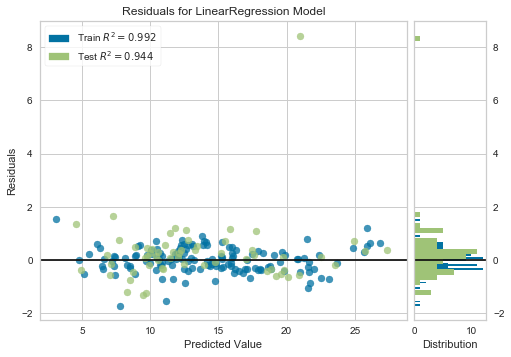

In [144]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure